<img src="DAT_512.png" width="300" height="140">

# Buffalo 311 Data Exploratory Analysis
---
Cassie Kamens<br>
Class - DAT 512 <br> 
Institution- Canisuis College<br>
Professor- Paul Lambson<br>
Spring 2023 <br>
<br>
### Exploratory Objectives<br>
- Explore how long it takes different services in Buffalo to respond to 311 calls.
- Explore how long it takes to respond to different 311 calls based on the type of service requested.
<br>


### Sections
- [Data Import(API)-Buffalo 311 Calls](#data_import)
- [Initial Dataframe Creation](#Initial_Dataframe_Creation)
- [Data Cleaning](#Data_Cleaning)
- [Final Dataframe](#Final_Dataframe)
- [Analysis- Dataframe Descriptions](#Analysis_Mean_Response_Time_by_Subject)
- [Analysis- Mean Respsonse Time by Subject](#Analysis_Mean_Response_Time_by_Subject_1)
- [Analysis-Average Case Duration by Neighborhood](#Analysis_Average_Case_Duration_by_Neighborhood)
- [Analysis-Case References by Subject in each Neighborhood](#Analysis_Case_References_by_Subject_in_each_Neighborhood)
- [Analysis-Average Case Duration by Subject in each Neighborhood](#Average_Case_Duration_by_Subject_in_each_Neighborhood)
- [Additional Analysis](#Additional_Analysis)

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Data Import(API)- Buffalo 311 Calls
<a id='data_import'></a>

---
-Import the data from https://data.buffalony.gov/Quality-of-Life/311-Service-Requests/whkc-e5vr using an API <br>
-Check the connection to the API <br>
-All data matching the parameters will be imported into a dataframe <br>

In [2]:
uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'
r = requests.get(uri)
print('Status code ',r.status_code)
print('Number of rows returned ',len(r.json()))
print('Endoced URI with params ',r.url)

Status code  200
Number of rows returned  1000
Endoced URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json


In [3]:
df=pd.DataFrame(r.json())
print(df.shape)

(1000, 48)


In [4]:
params_dict = {
    '$where':'date_extract_y(open_date)>2021',
    '$limit':1000000
}

uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'

r =requests.get(uri,params=params_dict)
print('Status code:',r.status_code)
print('Number of rows returned:',len(r.json()))
print('Endoced URI with params:',r.url)

Status code: 200
Number of rows returned: 112427
Endoced URI with params: https://data.buffalony.gov/resource/whkc-e5vr.json?%24where=date_extract_y%28open_date%29%3E2021&%24limit=1000000


In [5]:
df=pd.DataFrame(r.json())
print(df.shape)
df.head()

(112427, 33)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,x_coordinate,y_coordinate,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,address_line_2
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,-78.90191,42.93874,59,3,3006,005900,36029005900,360290059003,360290059003004,NaN
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,-8774730.591,5296131.1923,28,2,2010,002801,36029002801,360290028011,360290028011005,NaN
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,1076044.9,1052309.9,15,2,2008,001500,36029001500,360290015002,360290015002008,Peckham St
3,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,NaN,NaN,33.01,3,3007,003301,36029003301,360290033013,360290033013005,NaN
4,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,-78.8656,42.88533,14.02,4,4011,001404,36029001404,360290014042,360290014042010,NaN


# Initial Dataframe Creation
<a id='Initial_Dataframe_Creation'></a>

---
-Create a new dataframe containing only columns that will be used in analysis and cleaning<br>

In [6]:
Buff_311_Calls_2 = pd.DataFrame({'case_reference': df['case_reference'],
                                'open_date': df['open_date'],
                                'closed_date': df['closed_date'],
                                'status':df['status'],
                                'subject':df['subject'],
                                'reason':df['reason'],
                                'type':df['type'],
                                'neighborhood':df['neighborhood']})
Buff_311_Calls_2.head()

,case_reference,open_date,closed_date,status,subject,reason,type,neighborhood
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Black Rock
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Genesee-Moselle
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Broadway Fillmore
3,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Hamlin Park
4,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Pratt-Willert


# Data Cleaning
<a id='Data_Cleaning'></a>

---
-Set the index of the Dataframe to case_reference <br>
-Change the format of open_date and closed_date to be str variable <br>
-Create and call a function that will change the format of open_date' and closed_date to be a datetime variable that includes the month, day, and year <br>
-Create a function that will pull the year of the date from a datetime variable <br> 
-Create a new column containing only the year of the open_date <br>
-Remove test and unknown rows

In [7]:
Buff_311_Calls_2.set_index(Buff_311_Calls_2['case_reference'],inplace=True)

In [8]:
Buff_311_Calls_2.drop('case_reference', axis=1, inplace=True)

In [9]:
Buff_311_Calls_2.loc[:,'open_date'] = Buff_311_Calls_2.loc[:, 'open_date'].astype(str)
Buff_311_Calls_2.loc[:,'closed_date'] = Buff_311_Calls_2.loc[:, 'closed_date'].astype(str)

In [10]:
Buff_311_Calls_2.dropna()

def date(date1):
    try:
        newdate = datetime.datetime.strptime(date1,"%Y-%m-%dT%H:%M:%S.%f")
        final = newdate.strftime('%Y-%m-%d')
        return final
    except ValueError:
        faildate = datetime.datetime(2000,5,17)
        final = faildate.strftime('%Y-%m-%d')
        return final


Buff_311_Calls_2['open_date']=Buff_311_Calls_2.apply(lambda x : date(x['open_date']) , axis=1)
Buff_311_Calls_2['closed_date']=Buff_311_Calls_2.apply(lambda x : date(x['closed_date']) , axis=1)

In [11]:
def year_only(date1):
    newdate = datetime.datetime.strptime(date1,"%Y-%m-%d")
    final = newdate.strftime('%Y')
    return final

Buff_311_Calls_2['start_year']=Buff_311_Calls_2.apply(lambda x : year_only(x['open_date']) , axis=1)

In [12]:
Buff_311_Calls_2 = Buff_311_Calls_2.drop(Buff_311_Calls_2[Buff_311_Calls_2.subject == 'Test'].index)

In [13]:
Buff_311_Calls_2 = Buff_311_Calls_2.drop(Buff_311_Calls_2[Buff_311_Calls_2.neighborhood == 'UNKNOWN'].index)

# Final Dataframe
<a id='Final_Dataframe'></a>

---
-Create the final dataframe containing only 311 calls where the case started in 2022 <br>
-Create a function that will determine the number of days that occured between the day that the 311 case was open and the day that it was closed <br>
-Create a column showing the duration of each case by calling the function created above on each case <br>

---
-For this analysis, it is important to assume that the case has been closed. Open cases do not have a final day count and can not be considered in this analysis. <br>
-Create a function to check the status of the case; to make the deletion of data easier, the function will one-hot encode this variable <br> 
-Create a new column based on the results of calling the function described above on each case <br> 
-Drop the columns of the database where the status of the case is open <br>
-Delete columns that will not be useful in analysis

In [14]:
Buffalo_311_2022 = pd.DataFrame(Buff_311_Calls_2.where(Buff_311_Calls_2['start_year'] == '2022')).dropna()

In [15]:
def diff_day_function(d1, d2):
    d1 = datetime.datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

Buffalo_311_2022['case_duration']=Buffalo_311_2022.apply(lambda x : diff_day_function(x['open_date'],x['closed_date']) , axis=1)

In [16]:
def check_status(d1):
    if d1 == "Closed":
        return 0
    else:
        return 1

Buffalo_311_2022['status_check']=Buffalo_311_2022.apply(lambda x : check_status(x['status']) , axis=1)

In [17]:
Buffalo_311_2022 = Buffalo_311_2022.drop(Buffalo_311_2022[Buffalo_311_2022['status_check']==1].index)

In [18]:
del Buffalo_311_2022['status_check']

In [19]:
del Buffalo_311_2022['start_year']

In [20]:
del Buffalo_311_2022['status']

# Analysis- Dataframe Descriptions
<a id='Analysis_Mean_Response_Time_by_Subject'></a>

---
-Basic statistics on the case_duration column 

In [21]:
Buffalo_311_2022.describe()

,case_duration
count,95939.000000
mean,9.551861
std,19.758330
min,0.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,324.000000


# Analysis- Mean Response Time by Subject
<a id='Analysis_Mean_Response_Time_by_Subject_1'></a>

---
-The subject of the 311 call is the department tasked taking action to handle the 311 call <br>
-Create dataframe of the mean case duration by subject <br> 
-Drop the test column <br> 
-Create a bar graph from the dataframe <br> 

In [22]:
plt.rcParams['figure.figsize'] = [15, 8]

In [23]:
agg_subject = pd.DataFrame(Buffalo_311_2022.groupby(['subject'])['case_duration'].mean())

<AxesSubplot:xlabel='subject'>

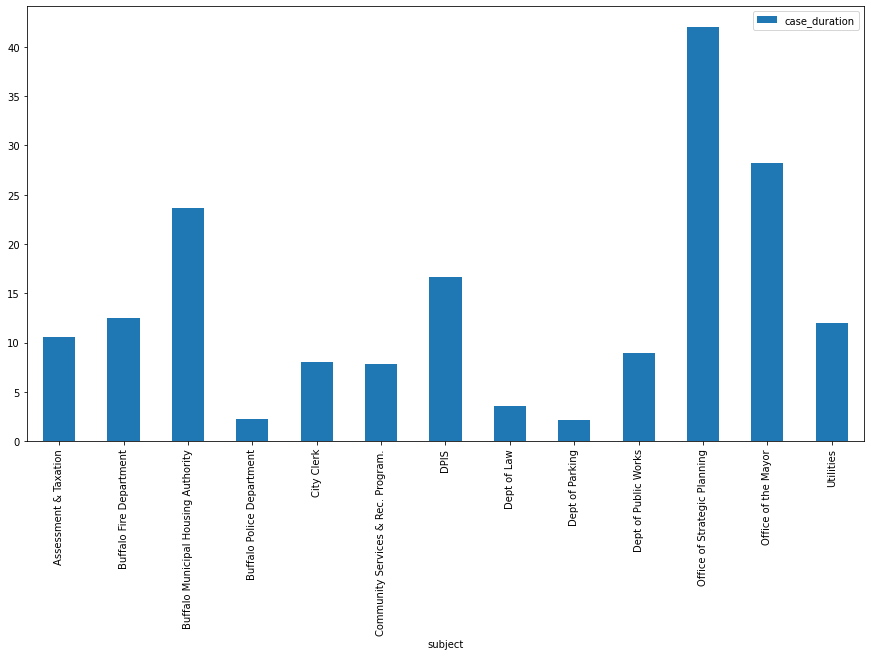

In [24]:
agg_subject.plot(kind="bar",stacked=True)

### Observations
---
-Subjects that had short reposnse times are the Buffalo Police Department and the Department of Parking <br>
-Subjects that had long response times are the Office of Strategic Planning and the Office of the Mayor <br>

# Analysis - Average Case Duration by Neighborhood
<a id='Analysis_Average_Case_Duration_by_Neighborhood'></a>

---
-The neighborhood of the 311 call is the location in which the action needs to be taken <br>
-Create dataframe of the mean case duration by neighborhood <br> 
-Drop the unknown column <br> 
-Create a bar graph from the dataframe <br>

In [25]:
agg_neighborhood = pd.DataFrame(Buffalo_311_2022.groupby(['neighborhood'])['case_duration'].mean())
agg_neighborhood

,case_duration
neighborhood,
Allentown,6.798186
Black Rock,11.479377
Broadway Fillmore,9.964093
Central,7.792244
Central Park,8.955111
Delavan Grider,9.884782
Ellicott,8.124672
Elmwood Bidwell,8.756933
Elmwood Bryant,8.354265


<AxesSubplot:xlabel='neighborhood'>

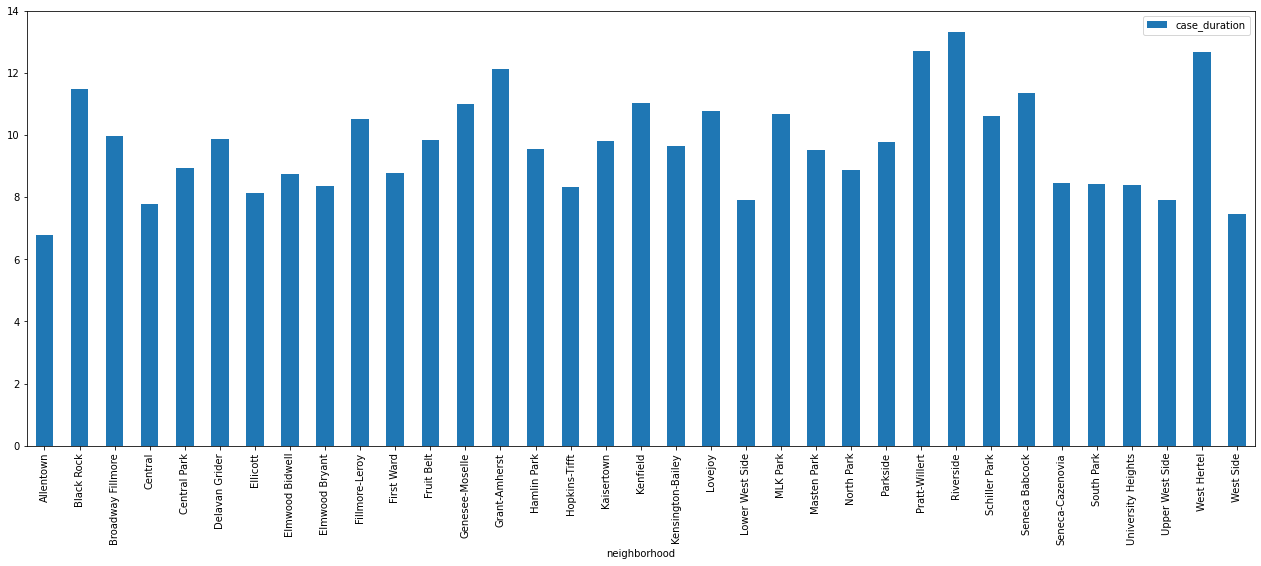

In [26]:
plt.rcParams['figure.figsize'] = [22, 8]
agg_neighborhood.plot(kind="bar",stacked=True)

### Observations
---
-Neighborhoods that had short reposnse times are Allentown, West Side, Lower West Side, Upper West Side  <br>
-Neighborhoods that had long response times are West Hertal, Riverside, Port-Willbert <br>

# Analysis - Case References by Subject in each Neighborhood
<a id='Analysis_Case_References_by_Subject_in_each_Neighborhood'></a>

---
-Create a dataframe that counts the number of cases that each subject responds to in each neighborhood <br>
-Counting the number of cases can be accomplished by counting any column in the dataframe
-Create a bar plot of the data frame

In [27]:
agg_subject_neighborhood_count = Buffalo_311_2022.groupby(['neighborhood','subject'])['subject'].count().unstack()
agg_subject_neighborhood_count

subject,Assessment & Taxation,Buffalo Fire Department,Buffalo Municipal Housing Authority,Buffalo Police Department,City Clerk,Community Services & Rec. Program.,DPIS,Dept of Law,Dept of Parking,Dept of Public Works,Office of Strategic Planning,Office of the Mayor,Utilities
neighborhood,,,,,,,,,,,,,
Allentown,NaN,1.0,NaN,137.0,NaN,NaN,201.0,NaN,195.0,1180.0,2.0,10.0,38.0
Black Rock,1.0,3.0,3.0,72.0,NaN,NaN,192.0,1.0,78.0,878.0,3.0,9.0,45.0
Broadway Fillmore,1.0,9.0,18.0,229.0,2.0,1.0,714.0,13.0,246.0,4238.0,16.0,35.0,215.0
Central,4.0,2.0,22.0,142.0,19.0,NaN,87.0,2.0,433.0,646.0,13.0,20.0,54.0
Central Park,1.0,3.0,NaN,57.0,NaN,NaN,238.0,NaN,47.0,1365.0,1.0,18.0,119.0
Delavan Grider,2.0,5.0,NaN,118.0,NaN,NaN,495.0,1.0,66.0,1752.0,7.0,12.0,85.0
Ellicott,1.0,1.0,23.0,48.0,NaN,NaN,84.0,2.0,45.0,518.0,1.0,7.0,32.0
Elmwood Bidwell,3.0,5.0,NaN,218.0,1.0,1.0,507.0,3.0,568.0,2919.0,2.0,17.0,191.0
Elmwood Bryant,2.0,3.0,18.0,206.0,NaN,NaN,521.0,5.0,328.0,2091.0,15.0,25.0,162.0


<AxesSubplot:xlabel='neighborhood'>

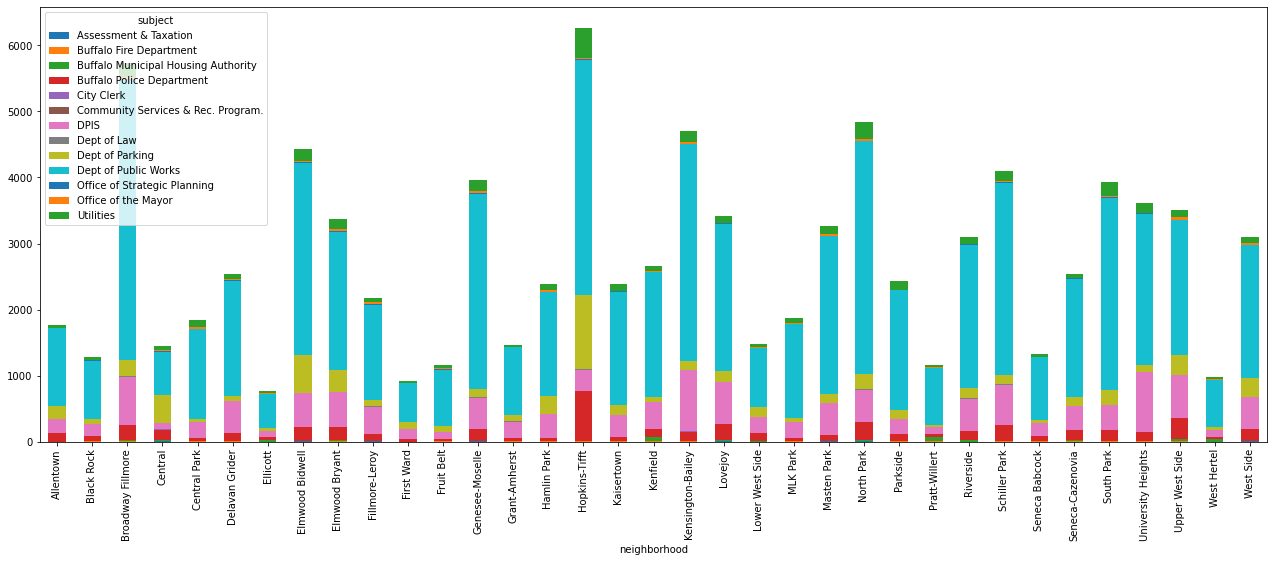

In [28]:
agg_subject_neighborhood_count.plot(kind="bar",stacked=True)

### Observations
---
-Broadway-Fillmore and Hopkins-Tifft made the most 311 calls in 2022<br>
-Ellicott made the least 311 calls in 2022 <br> 
-The Office of Strategic Planning, DPIS, Utilities, and the Buffalo Police Departments recieved the most 311 calls in 2022 <br> 

# Analysis- Average Case Duration by Subject in each Neighborhood
<a id='Average_Case_Duration_by_Subject_in_each_Neighborhood'></a>

---
-Create a dataframe that shows the mean case duration in each neighborhood for each subject <br> 
-Create a heatmap to show the mean response times in the dataframe <br>

In [29]:
agg_subject_neighborhood = Buffalo_311_2022.groupby(['subject','neighborhood'])['case_duration'].mean().unstack()
agg_subject_neighborhood

neighborhood,Allentown,Black Rock,Broadway Fillmore,Central,Central Park,Delavan Grider,Ellicott,Elmwood Bidwell,Elmwood Bryant,Fillmore-Leroy,...,Pratt-Willert,Riverside,Schiller Park,Seneca Babcock,Seneca-Cazenovia,South Park,University Heights,Upper West Side,West Hertel,West Side
subject,,,,,,,,,,,,,,,,,,,,,
Assessment & Taxation,NaN,22.000000,0.000000,8.500000,0.000000,18.500000,0.000000,4.000000,20.500000,1.333333,...,17.000000,54.000000,12.000000,1.000000,9.500000,11.000000,5.500000,0.000000,2.000000,5.666667
Buffalo Fire Department,4.000000,20.000000,10.777778,14.500000,4.666667,9.000000,3.000000,6.400000,13.000000,4.750000,...,13.800000,0.000000,12.555556,13.333333,16.333333,16.363636,21.714286,19.400000,NaN,54.000000
Buffalo Municipal Housing Authority,NaN,41.333333,20.277778,21.727273,NaN,NaN,23.739130,NaN,22.111111,NaN,...,21.846154,25.615385,15.000000,29.750000,27.666667,NaN,NaN,26.593750,26.902439,NaN
Buffalo Police Department,2.138686,2.333333,1.624454,2.464789,1.842105,1.483051,1.583333,2.655963,2.111650,3.009804,...,2.555556,3.097015,2.466667,2.443038,2.264901,2.154762,2.006993,1.957187,4.866667,2.340659
City Clerk,NaN,NaN,1.500000,9.842105,NaN,NaN,NaN,6.000000,NaN,1.500000,...,NaN,NaN,NaN,2.000000,11.000000,NaN,NaN,NaN,NaN,NaN
Community Services & Rec. Program.,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,...,4.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
DPIS,6.238806,36.437500,20.535014,8.873563,10.651261,13.327273,10.309524,18.536489,8.218810,17.153477,...,8.574257,40.872951,21.480456,28.113990,9.934247,4.087071,6.180602,10.382946,45.675926,6.135524
Dept of Law,NaN,0.000000,3.307692,12.500000,NaN,0.000000,2.000000,0.666667,1.600000,2.333333,...,0.500000,3.250000,4.200000,2.500000,NaN,4.000000,5.750000,6.000000,3.000000,7.000000
Dept of Parking,1.425641,2.628205,2.760163,1.260970,2.212766,2.000000,1.822222,1.713028,1.847561,1.862745,...,2.888889,2.102410,1.645833,1.820513,2.743056,2.845133,1.444444,1.742475,5.512195,1.481229


<AxesSubplot:xlabel='neighborhood', ylabel='subject'>

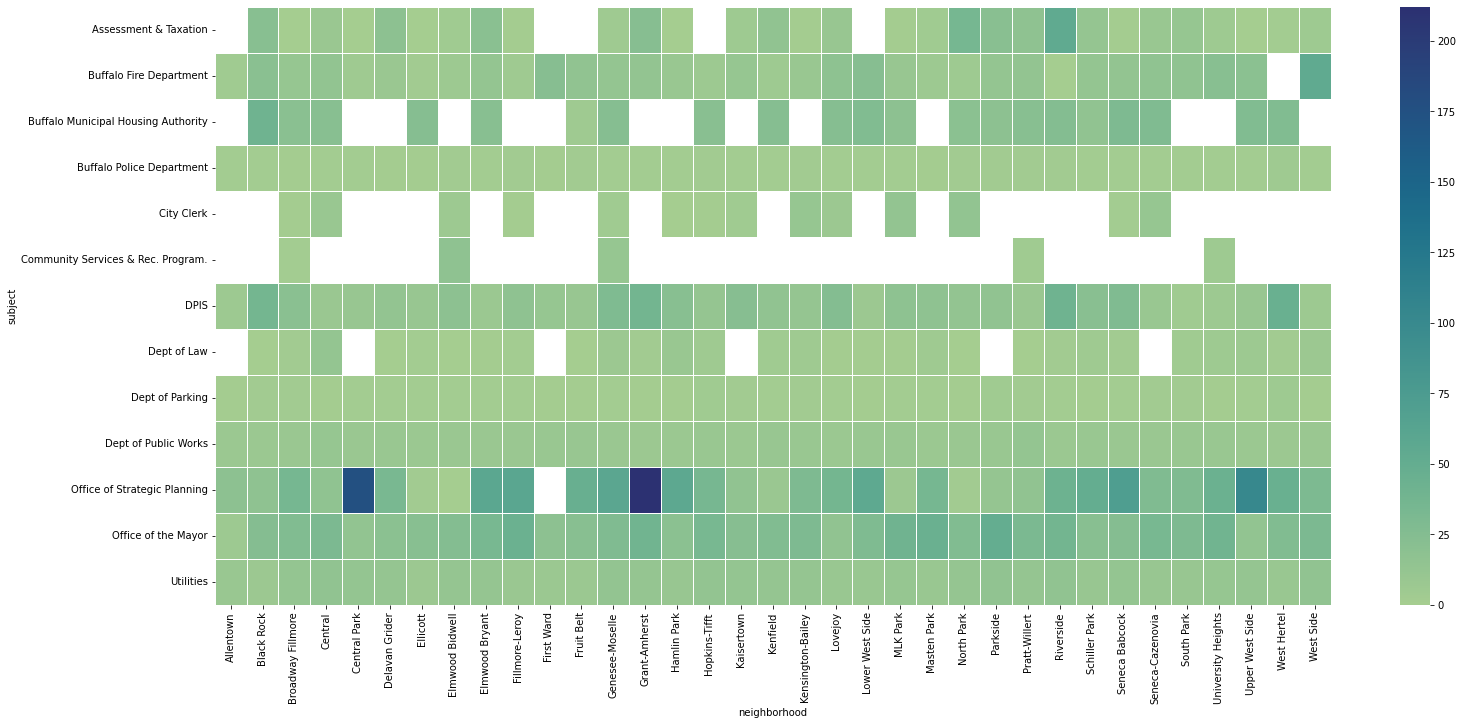

In [30]:
plt.rcParams['figure.figsize'] = [25, 11]
sns.heatmap(agg_subject_neighborhood,cmap="crest",linewidth=1)

### Observations
---
-Particularlly high response times occured in Central Park and Grant-Amherst with the Office of Strategic Planning <br>
-There are no low standouts; most values are in the same color range <br>
-The white cells represent NaN values or neighborhoods that did not have any 311 calls for a subject in 2022 <br> 

# Additional Analysis
<a id='Additional_Analysis'></a>

### Minimum and Maximum Case Duration by Subject in each Neighborhood
<a id='Minimum and Maximum Case Duration by Subject in each Neighborhood'></a>

---
-Using the dataframe agg_subject_neighborhood find the minimum and maximum vales of case duration  <br> 

In [31]:
subject_neighborhood_min_max=pd.DataFrame(
    {
        'max_average_close':agg_subject_neighborhood.idxmax(),
        'min_average_close':agg_subject_neighborhood.idxmin()
    }
)
subject_neighborhood_min_max

,max_average_close,min_average_close
neighborhood,,
Allentown,Office of Strategic Planning,Dept of Parking
Black Rock,Buffalo Municipal Housing Authority,Dept of Law
Broadway Fillmore,Office of Strategic Planning,Assessment & Taxation
Central,Office of the Mayor,Dept of Parking
Central Park,Office of Strategic Planning,Assessment & Taxation
Delavan Grider,Office of Strategic Planning,Dept of Law
Ellicott,Buffalo Municipal Housing Authority,Assessment & Taxation
Elmwood Bidwell,Office of the Mayor,Office of Strategic Planning
Elmwood Bryant,Office of Strategic Planning,Dept of Law


### Observations
---
-Subjects that had long response times in 2022 were either the Office of Strategic Planning or the Office of the Mayor in almost all neighborhoods <br>
-The Buffalo Police Department, Assessment and Taxation, Department of Parking, and the Department of Law were the lowest response times in most neighborhoods <br> 

### Minimum and Maximum Case Duration by Type in each Neighborhood
<a id='Minimum and Maximum Case Duration by Type in each Neighborhood'></a>

---
-Type is specific complaint that was made in the 311 call or request <br> 
-Create a dataframe that shows the mean case duration in each neighborhood for each type <br>
-Using the dataframe,find the minimum and maximum vales of case duration  <br> 

In [32]:
agg_type_neighborhood = Buffalo_311_2022.groupby(['type','neighborhood'])['case_duration'].mean().unstack()
agg_type_neighborhood = pd.DataFrame(agg_type_neighborhood)

In [33]:
type_neighborhood_min_max= pd.DataFrame(
    {
        'max_average_close':agg_type_neighborhood.idxmax(),
        'min_average_close':agg_type_neighborhood.idxmin()
    }
)
type_neighborhood_min_max

,max_average_close,min_average_close
neighborhood,,
Allentown,Sign Hazards (Req_Serv),Boarding request (Req_Serv)
Black Rock,Damaged Street Light Pole (Req_Serv),Buffalo Traffic Violations (Req_Serv)
Broadway Fillmore,Damaged Street Light Pole (Req_Serv),City Clerk Issue (Req_Serv)
Central,Damaged Street Light Pole (Req_Serv),Abandoned Vehicles (Req_Serv)
Central Park,Damaged Street Light Pole (Req_Serv),Abandoned Vehicle Inspection (Req_Serv)
Delavan Grider,Sign Hazards (Req_Serv),Abandoned Vehicle Inspection (Req_Serv)
Ellicott,Snow Removal Bus Stop/Shelter (Req_Serv),Buffalo Traffic Violations (Req_Serv)
Elmwood Bidwell,Damaged Street Light Pole (Req_Serv),Abandoned Vehicle Inspection (Req_Serv)
Elmwood Bryant,Damaged Street Light Pole (Req_Serv),Fridge (Req_Serv)


### Observations
---
-Damaged Street Light Poles are consistently high response times <br>
-Abandoned Vehicled appear in the low response time column frequently <br>

# Dataframe to File
<a id='DF_to_file'></a>

In [34]:
Buffalo_311_2022.to_csv('Buffalo_311_Calls_2022_DF',encoding='utf-8')